# EDA on the modified & cleaned movies Dataset
- Name: Basel Mohamed Mostafa Sayed
- Email: baselmohamed802@gmail.com
- Description: This file is a continuation of the main.ipynb file of the Movies Dataset, where after cleaning, modifying, and properly formatting the dataset, it is ready for EDA.

In [23]:
# include all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
from scipy.stats import mstats
from scipy.stats.mstats import winsorize
from matplotlib.patches import ArrowStyle
warnings.filterwarnings('ignore')

In [24]:
# import the Dataset
try:
    df = pd.read_csv('movies_cleaned.csv')
    expected_cols = ['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability', 
    'Rotten Tomatoes %', 'Worldwide Gross', 'Year', 'Decade', 'isIndependent',
    'Critic-Audience Gap Rating', 'ROI_Category', 'Profitability_winsorized', 'Worldwide Gross_winsorized']
    if list(df.columns) == expected_cols:
        print('Dataset is valid')
    else:
        raise ValueError("Dataset imported is not what was expected")
        sys.exit(1)
except FileNotFoundError:
    print('File not found')
    sys.exit(1)
except pd.errors.EmptyDataError:
    print('File or Dataset is empty')
    sys.exit(1)
except ValueError as VE:
    print("Value Error: ", VE)
    sys.exit(1)
except Exception as E:
    print("Error: ", E)
    sys.exit(1)

df.head(10)

Dataset is valid


,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year,Decade,isIndependent,Critic-Audience Gap Rating,ROI_Category,Profitability_winsorized,Worldwide Gross_winsorized
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70.0,1.747542,64.0,41.94,2008,2000s,Major Studio,Favored by audience,Low,1.747542,41.940
1,Youth in Revolt,Comedy,The Weinstein Company,52.0,1.090000,68.0,19.62,2010,2010s,Major Studio,Favored by critics,Low,1.090000,19.620
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35.0,1.211818,43.0,26.66,2010,2010s,Independent,Favored by critics,Low,1.211818,26.660
3,When in Rome,Comedy,Disney,44.0,0.000000,15.0,43.04,2010,2010s,Major Studio,Favored by audience,Low,0.178526,43.040
4,What Happens in Vegas,Comedy,Fox,72.0,6.267647,28.0,219.37,2008,2000s,Major Studio,Favored by audience,High,6.267647,219.370
5,Water For Elephants,Drama,20th Century Fox,72.0,3.081421,60.0,117.09,2011,2010s,Major Studio,Favored by audience,Medium,3.081421,117.090
6,WALL-E,Animation,Disney,89.0,2.896019,96.0,521.28,2008,2000s,Major Studio,Favored by critics,Medium,2.896019,447.059
7,Waitress,Romance,Independent,67.0,11.089742,89.0,22.18,2007,2000s,Independent,Favored by critics,High,10.452941,22.180
8,Waiting For Forever,Romance,Independent,53.0,0.005000,6.0,0.03,2011,2010s,Independent,Favored by audience,Low,0.178526,13.227
9,Valentine's Day,Comedy,Warner Bros.,54.0,4.184038,17.0,217.57,2010,2010s,Major Studio,Favored by audience,High,4.184038,217.570


## 1. Basic Distributions

### 1.1. Plotting Distributions:
- Count of movies per Genre
- Count of movies per Studio
- Number of movies per decade
- Distribution of Audience Score %, Rotten Tomatoes %, Profitability, and Worldwide Gross

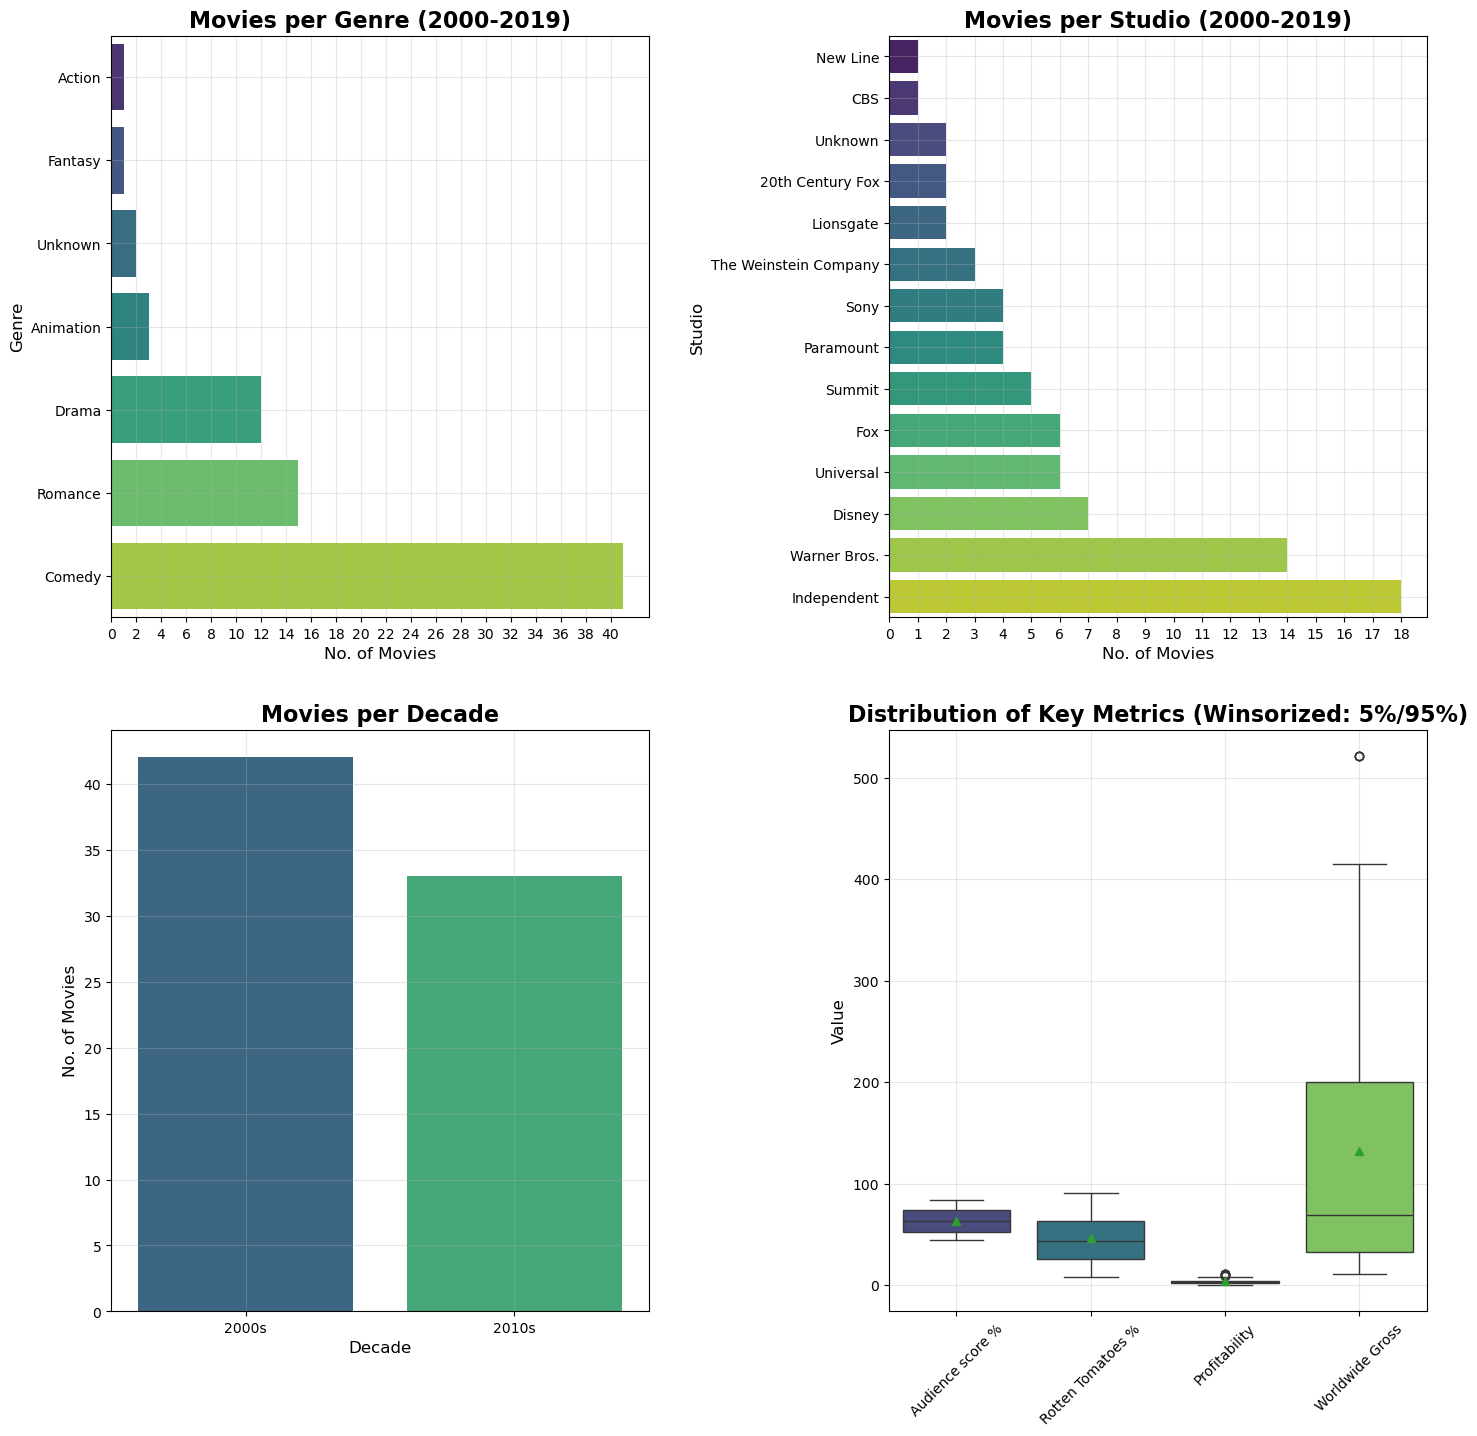

In [25]:
# Configure subplots grid
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Common styling
title_style = {'fontsize': 16, 'fontweight': 'bold'}
label_style = {'fontsize': 12}
grid_style = {'alpha': 0.3}

# Get counts
genre_counts = df['Genre'].value_counts().sort_values(ascending=True)
studio_counts = df['Lead Studio'].value_counts().sort_values(ascending=True)
movies_decade_counts = df['Decade'].value_counts().sort_index()

# Plot 1: Movies per Genre
sns.barplot(x=genre_counts.values, y=genre_counts.index, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Movies per Genre (2000-2019)', **title_style)
ax[0, 0].set_xlabel('No. of Movies', **label_style)
ax[0, 0].set_ylabel('Genre', **label_style)
ax[0, 0].set_xticks(np.arange(0, genre_counts.max() + 1, 2))
ax[0, 0].grid(**grid_style)

# Plot 2: Movies per Studio
sns.barplot(x=studio_counts.values, y=studio_counts.index, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Movies per Studio (2000-2019)', **title_style)
ax[0, 1].set_xlabel('No. of Movies', **label_style)
ax[0, 1].set_ylabel('Studio', **label_style)
ax[0, 1].set_xticks(np.arange(0, studio_counts.max() + 1, 1))
ax[0, 1].grid(**grid_style)

# Plot 3: Movies per Decade
sns.barplot(x=movies_decade_counts.index, y=movies_decade_counts.values, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('Movies per Decade', **title_style)
ax[1, 0].set_xlabel('Decade', **label_style)
ax[1, 0].set_ylabel('No. of Movies', **label_style)
ax[1, 0].grid(**grid_style)

# Plot 4: Winsorized Boxplots
metrics = ['Audience score %', 'Rotten Tomatoes %', 'Profitability', 'Worldwide Gross']
df_winsorized = df.copy()
for col in metrics:
    df_winsorized[col] = winsorize(df[col], limits=[0.05, 0.05])

sns.boxplot(data=df_winsorized[metrics], ax=ax[1, 1], palette='viridis', showmeans=True)
ax[1, 1].set_title('Distribution of Key Metrics (Winsorized: 5%/95%)', **title_style)
ax[1, 1].set_ylabel('Value', **label_style)
ax[1, 1].tick_params(axis='x', rotation=45)
ax[1, 1].grid(**grid_style)

# Show all Plots
plt.tight_layout(pad=3.0)
plt.show()

## 2. Profitability Analysis

### 2.1. Visualiztion & Plotting of Profitability
- Average profitability per Genre
- Average profitability per Studio
- Profitability trend by year
- Most and least profitable films

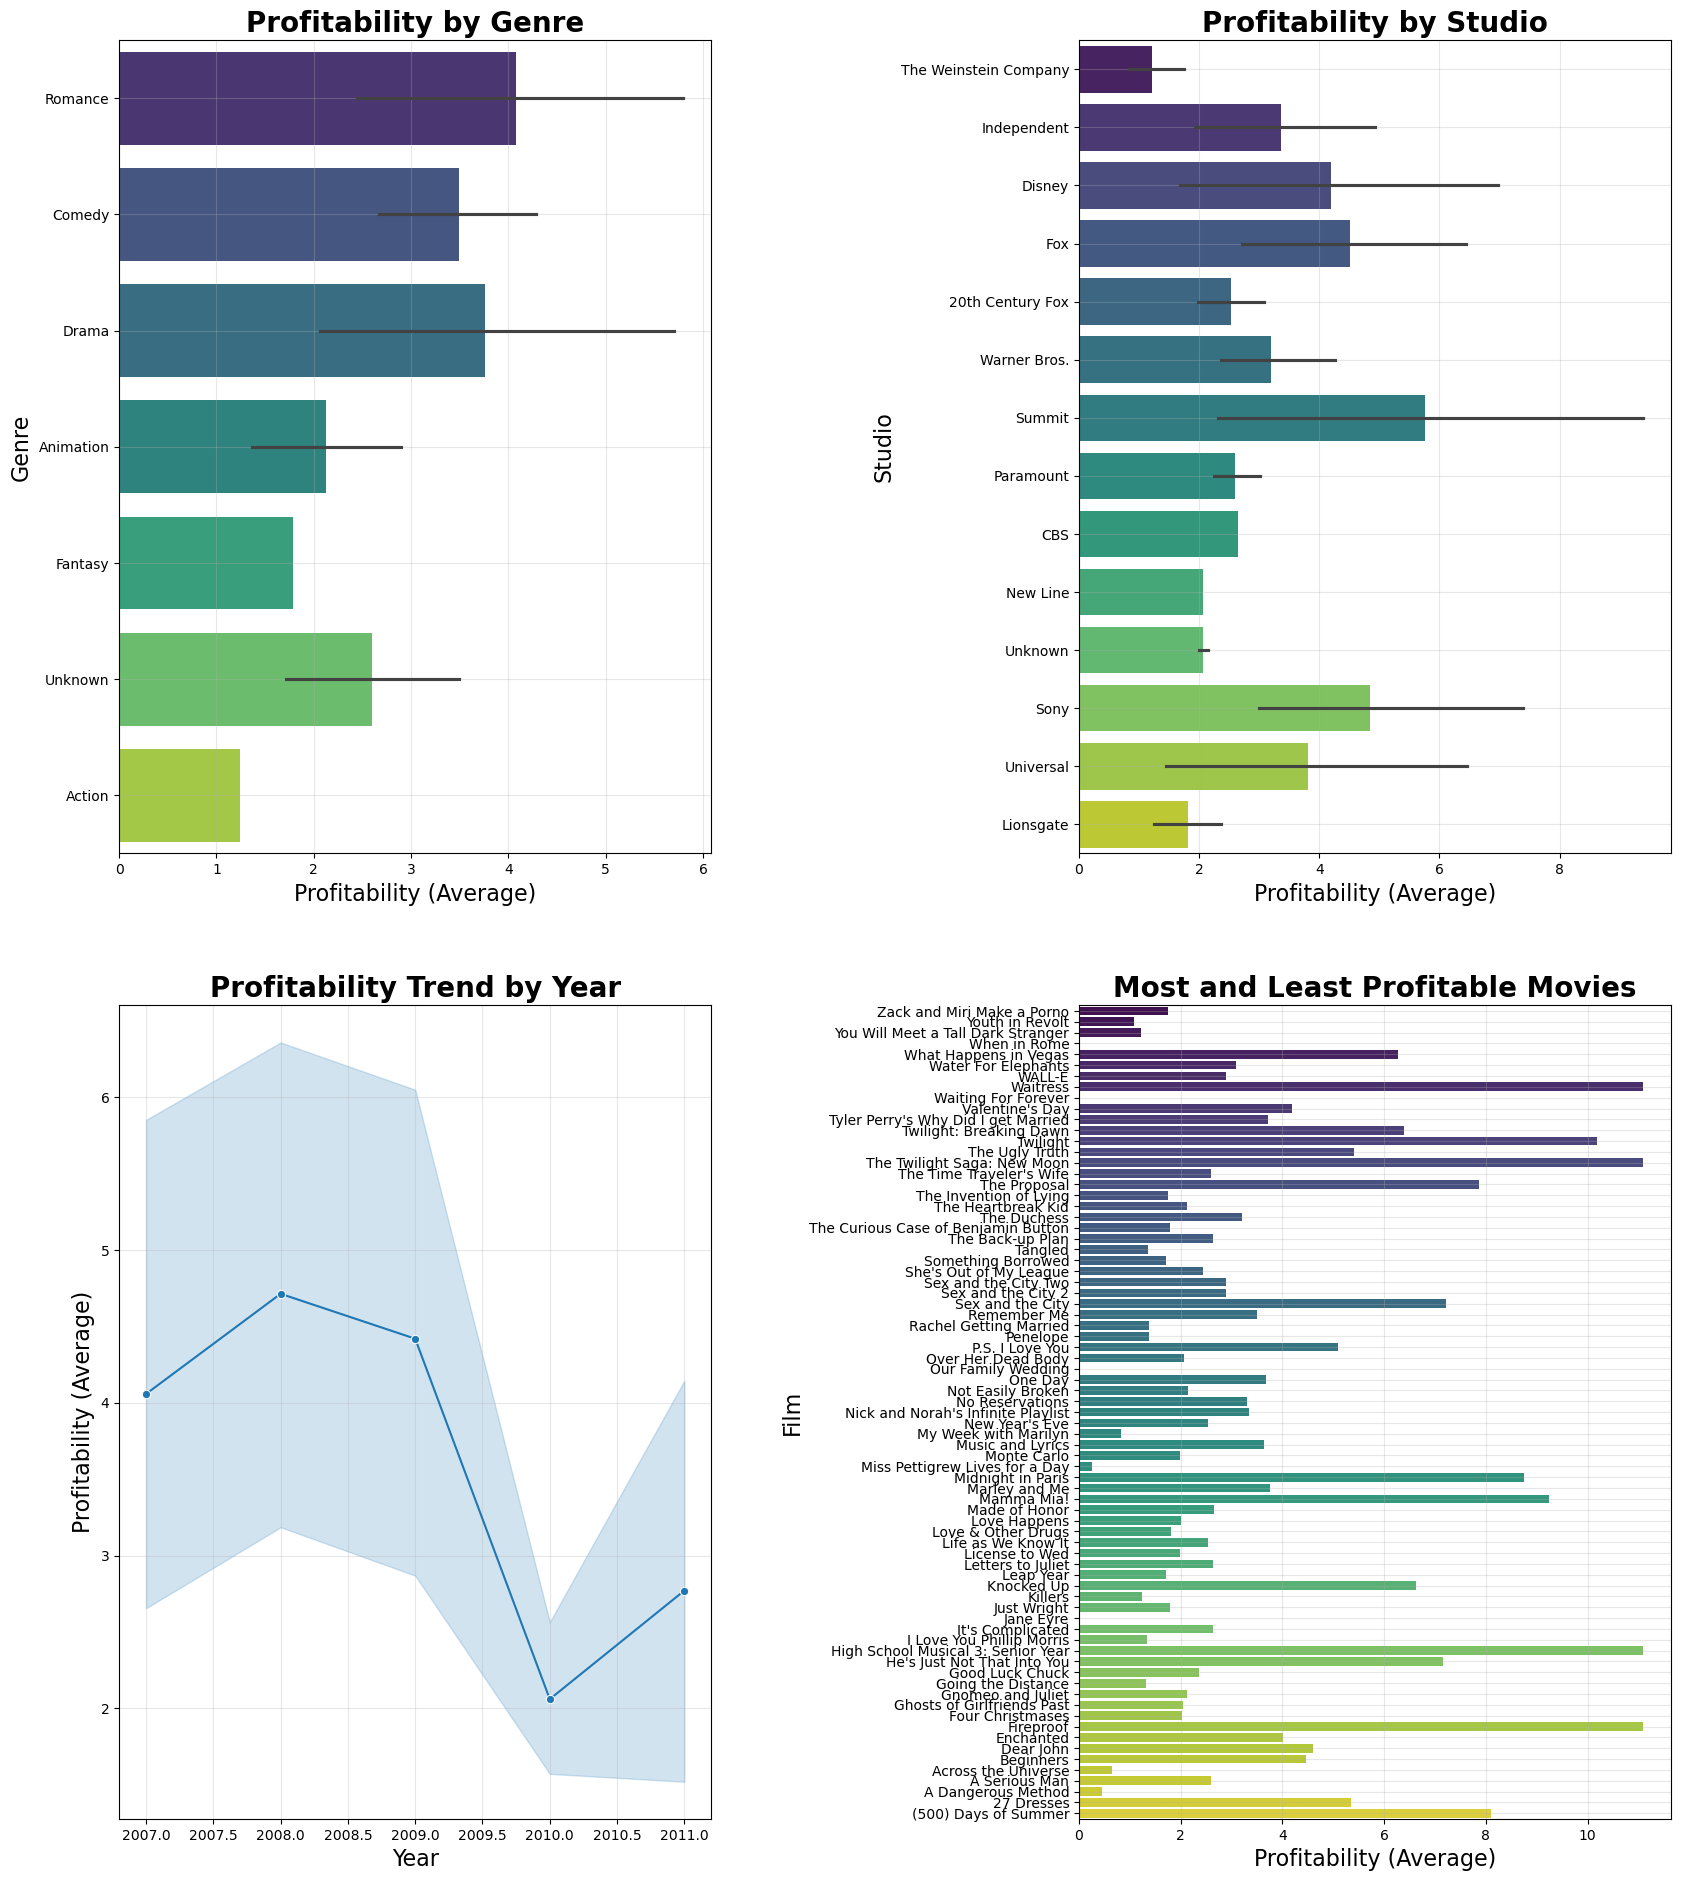

In [26]:
# Configure subplots grid
fig, ax = plt.subplots(2, 2, figsize=(18, 20))

# Common styling
title_style = {'fontsize': 20, 'fontweight': 'bold'}
label_style = {'fontsize': 16}
grid_style = {'alpha': 0.3}

# Plot 1: profitability by genre
sns.barplot(x='Profitability', y='Genre', data=df, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Profitability by Genre', **title_style)
ax[0, 0].set_xlabel('Profitability (Average)', **label_style)
ax[0, 0].set_ylabel('Genre', **label_style)
ax[0, 0].grid(**grid_style)
 
# Plot 2: profitability by studio
sns.barplot(x='Profitability', y='Lead Studio', data=df, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Profitability by Studio', **title_style)
ax[0, 1].set_xlabel('Profitability (Average)', **label_style)
ax[0, 1].set_ylabel('Studio', **label_style)
ax[0, 1].grid(**grid_style)

# Plot 3: profitability trend by year
sns.lineplot(x='Year', y='Profitability', data=df, ax=ax[1, 0], palette='viridis', marker='o')
ax[1, 0].set_title('Profitability Trend by Year', **title_style)
ax[1, 0].set_xlabel('Year', **label_style)
ax[1, 0].set_ylabel('Profitability (Average)', **label_style)
ax[1, 0].grid(**grid_style)

# Plot 4: Most and least profitable movies
sns.barplot(x='Profitability', y='Film', data=df, ax=ax[1, 1], palette='viridis')
ax[1, 1].set_title('Most and Least Profitable Movies', **title_style)
ax[1, 1].set_xlabel('Profitability (Average)', **label_style)
ax[1, 1].set_ylabel('Film', **label_style)
ax[1, 1].grid(**grid_style)

# show all plots
plt.tight_layout(pad=5.0)
plt.show()

## 3. Ratings Analysis

### 3.1. Visualiztion & Plotting of Ratings
- Compare audience vs critic ratings.
- Genres with highest average ratings.
- Studios with highest average ratings.
- Largest critic–audience disagreements.


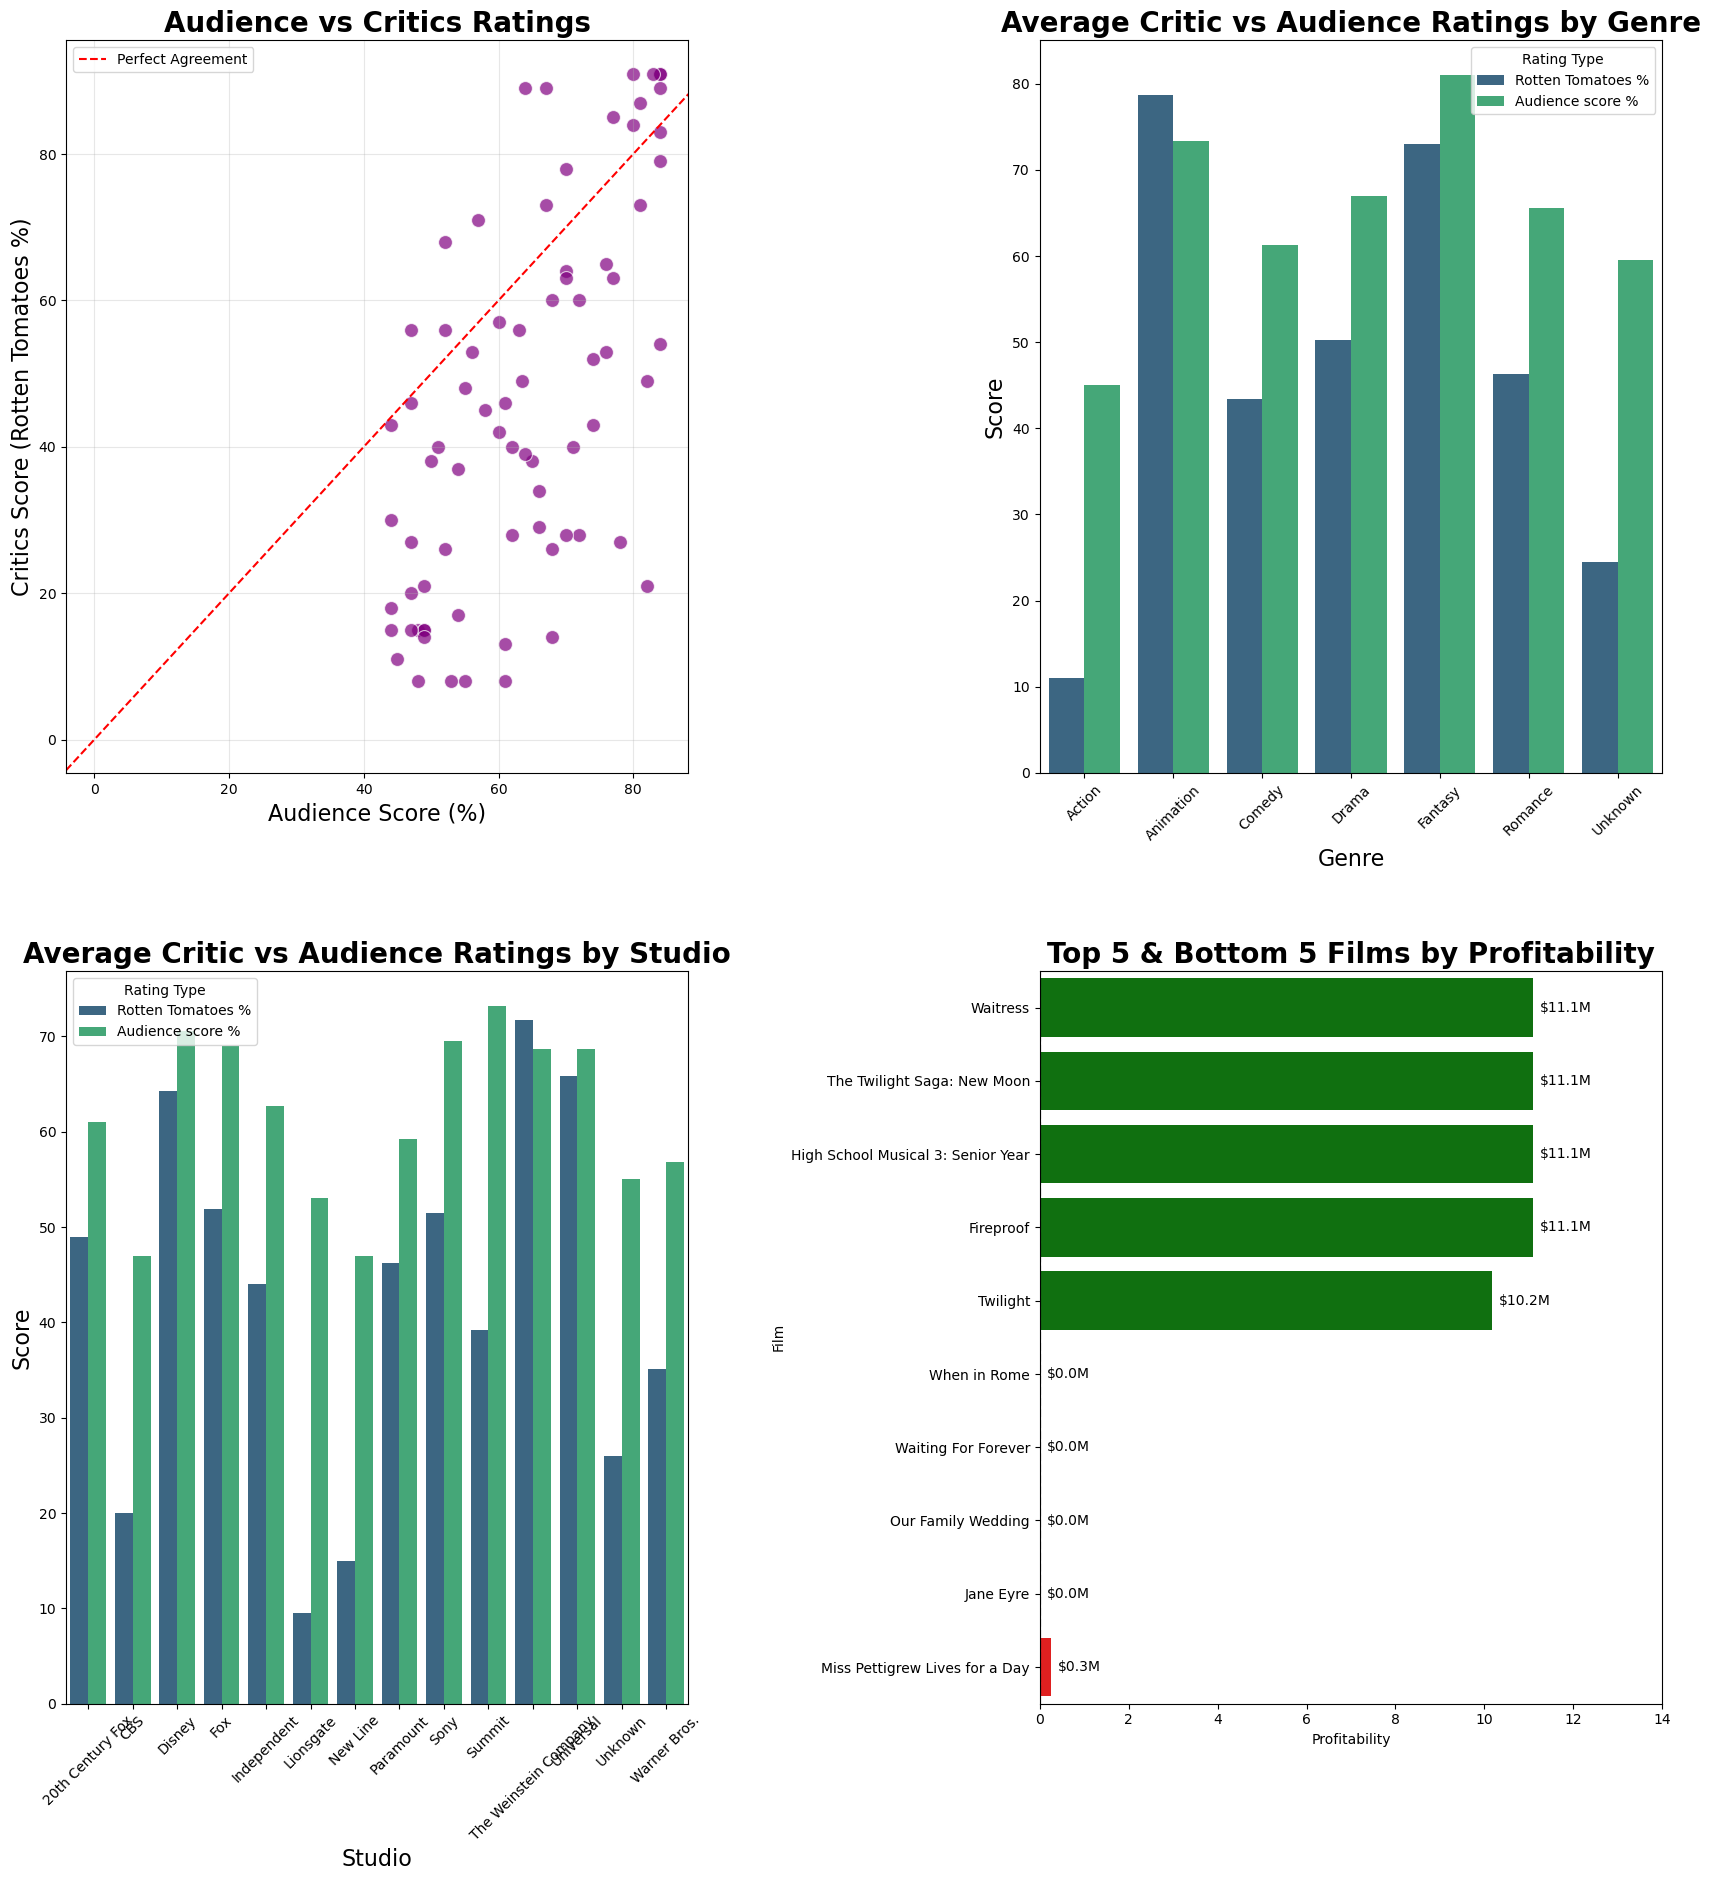

In [27]:
# Configure subplots grid
fig, ax = plt.subplots(2, 2, figsize=(18, 20))

# Common styling
title_style = {'fontsize': 20, 'fontweight': 'bold'}
label_style = {'fontsize': 16}
grid_style = {'alpha': 0.3}

# Plot 1: Audience vs Critics ratings
sns.scatterplot(x='Audience score %', y='Rotten Tomatoes %', data=df, ax=ax[0, 0], color='purple', alpha=0.7, s=100)
ax[0, 0].set_title('Audience vs Critics Ratings', **title_style)
ax[0, 0].set_xlabel('Audience Score (%)', **label_style)
ax[0, 0].set_ylabel('Critics Score (Rotten Tomatoes %)', **label_style)
ax[0, 0].axline((0, 0), slope=1, color='red', linestyle='--', label='Perfect Agreement')
ax[0, 0].legend(loc='upper left')
ax[0, 0].grid(**grid_style)

# Plot 2: Genres with highest avg ratings (both critics and Audience)
# Sort the Data first
genre_ratings = df.groupby('Genre')[['Rotten Tomatoes %', 'Audience score %']].mean().reset_index()
melted_ratings = genre_ratings.melt(id_vars='Genre', var_name='Rating Type', value_name='Score')

sns.barplot(x='Genre', y='Score', hue='Rating Type', data=melted_ratings, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Average Critic vs Audience Ratings by Genre', **title_style)
ax[0, 1].set_xlabel('Genre', **label_style)
ax[0, 1].set_ylabel('Score', **label_style)
ax[0, 1].tick_params(axis='x', rotation=45)
ax[0, 1].legend(title='Rating Type')

# Plot 3: Studios with highest average rating (both critics and Audience)
studio_ratings = df.groupby('Lead Studio')[['Rotten Tomatoes %', 'Audience score %']].mean().reset_index()
melted_ratings = studio_ratings.melt(id_vars='Lead Studio', var_name='Rating Type', value_name='Score')

sns.barplot(x='Lead Studio', y='Score', hue='Rating Type', data=melted_ratings, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('Average Critic vs Audience Ratings by Studio', **title_style)
ax[1, 0].set_xlabel('Studio', **label_style)
ax[1, 0].set_ylabel('Score', **label_style)
ax[1, 0].tick_params(axis='x', rotation=45)
ax[1, 0].legend(title='Rating Type')

# Plot 4: Largest critic vs audience gap
# Create a combined dataframe to sort the data
top_profit = df.nlargest(5, 'Profitability')
bottom_profit = df.nsmallest(5, 'Profitability')
combined = pd.concat([top_profit, bottom_profit])

sns.barplot(x='Profitability', y='Film', data=combined, ax=ax[1, 1], palette=['green']*5 + ['red']*5)
ax[1, 1].set_title('Top 5 & Bottom 5 Films by Profitability', **title_style)
ax[1, 1].axvline(0, color='black', linestyle='--')  # Break-even line
ax[1, 1].set_xticks(np.arange(0, 15, 2))

# Add profit values on bars
for p in ax[1, 1].patches:
    ax[1, 1].annotate(
        f'${p.get_width():.1f}M', 
        (p.get_width(), p.get_y() + p.get_height()/2),
        ha='left' if p.get_width() > 0 else 'right',
        va='center',
        xytext=(5, 0),
        textcoords='offset points'
    )

# Show the plots
plt.tight_layout(pad=5.0)
plt.show()

## 4. Revenue Analysis

### 4.1. Plotting and Visualizing Revenue
- Top 10 highest-grossing movies.
- Revenue by genre.
- Revenue by studio.
- Yearly trends in Worldwide Gross.


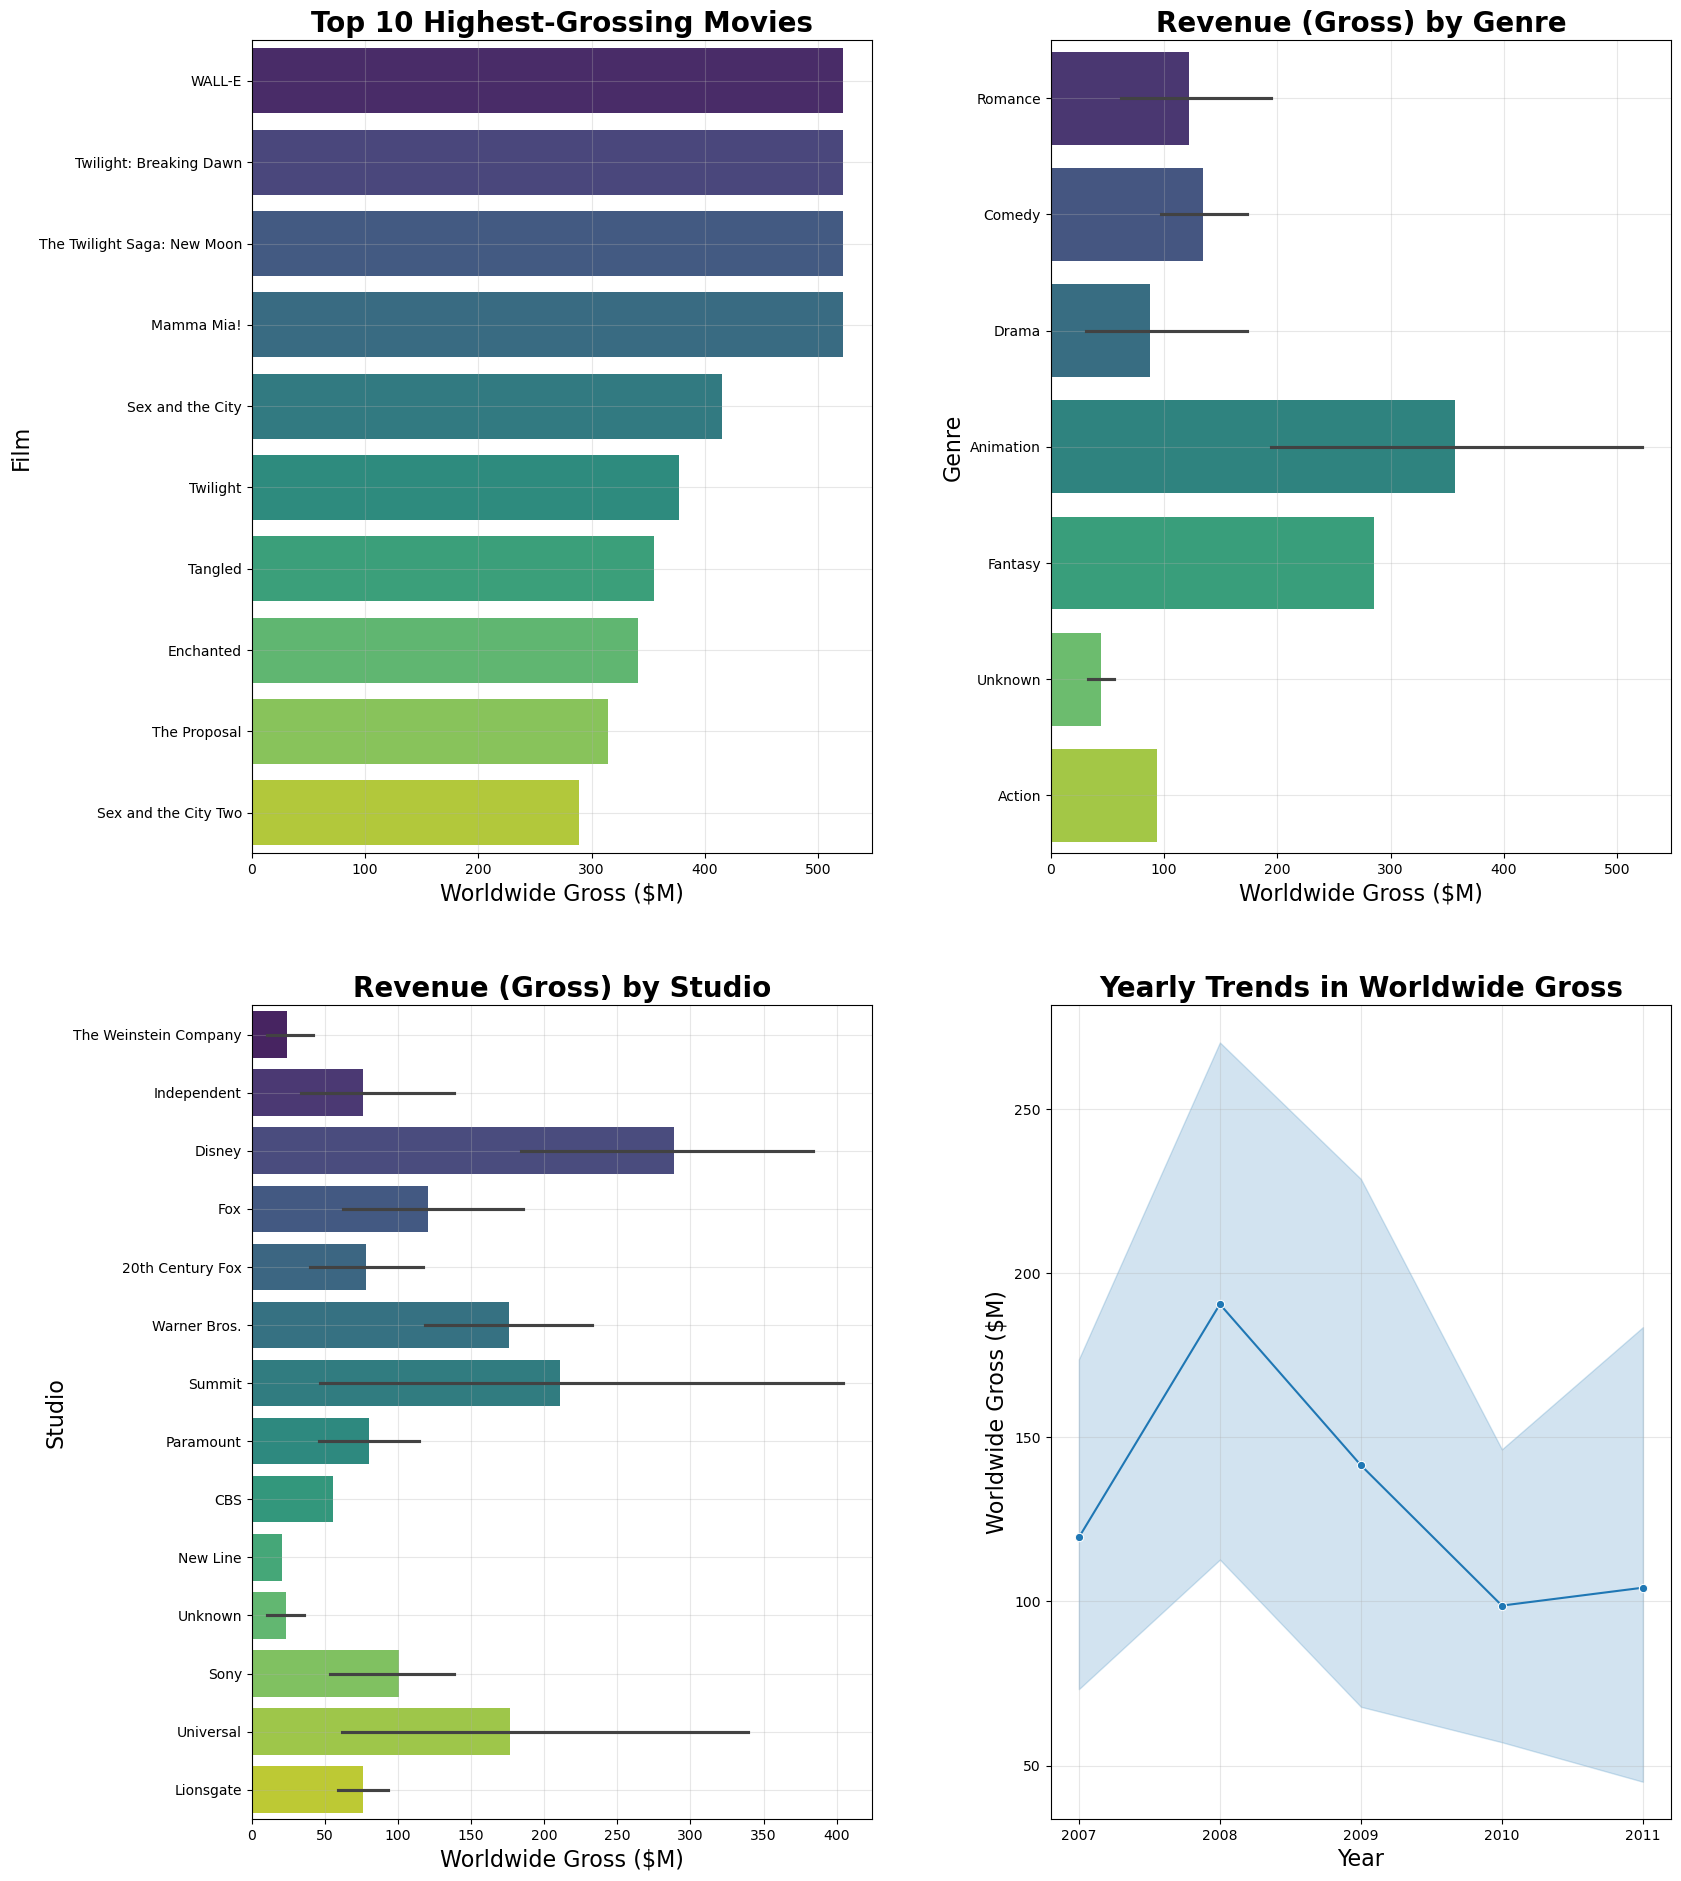

In [28]:
# Configure subplots grid
fig, ax = plt.subplots(2, 2, figsize=(18, 20))

# Common styling
title_style = {'fontsize': 20, 'fontweight': 'bold'}
label_style = {'fontsize': 16}
grid_style = {'alpha': 0.3}

# Plot 1: Top 10 highest-grossing movies
sns.barplot(x='Worldwide Gross', y='Film', data=df.nlargest(10, 'Worldwide Gross'), ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Top 10 Highest-Grossing Movies', **title_style)
ax[0, 0].set_xlabel('Worldwide Gross ($M)', **label_style)
ax[0, 0].set_ylabel('Film', **label_style)
ax[0, 0].grid(**grid_style)

# Plot 2: Revenue (Gross) by genre
sns.barplot(x='Worldwide Gross', y='Genre', data=df, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Revenue (Gross) by Genre', **title_style)
ax[0, 1].set_xlabel('Worldwide Gross ($M)', **label_style)
ax[0, 1].set_ylabel('Genre', **label_style)
ax[0, 1].grid(**grid_style)

# Plot 3: Revenue (Gross) by studio
sns.barplot(x='Worldwide Gross', y='Lead Studio', data=df, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('Revenue (Gross) by Studio', **title_style)
ax[1, 0].set_xlabel('Worldwide Gross ($M)', **label_style)
ax[1, 0].set_ylabel('Studio', **label_style)
ax[1, 0].grid(**grid_style)

# Plot 4: Yearly trends in Worldwide Gross
sns.lineplot(x='Year', y='Worldwide Gross', data=df, ax=ax[1, 1], palette='viridis', marker='o')
ax[1, 1].set_title('Yearly Trends in Worldwide Gross', **title_style)
ax[1, 1].set_xlabel('Year', **label_style)
ax[1, 1].set_ylabel('Worldwide Gross ($M)', **label_style)
ax[1, 1].set_xticks(np.arange(df['Year'].min(), df['Year'].max() + 1, 1))
ax[1, 1].grid(**grid_style)

# Show the plots
plt.tight_layout(pad=5.0)
plt.show()

## 5. Relationships between Key Metrics

### 5.1. Plotting and Visualizing Relationships
- Profitability vs Audience Score %.
- Profitability vs Rotten Tomatoes %.
- Correlation between all numeric variables (heatmap).
- Does high critic rating predict high profitability?


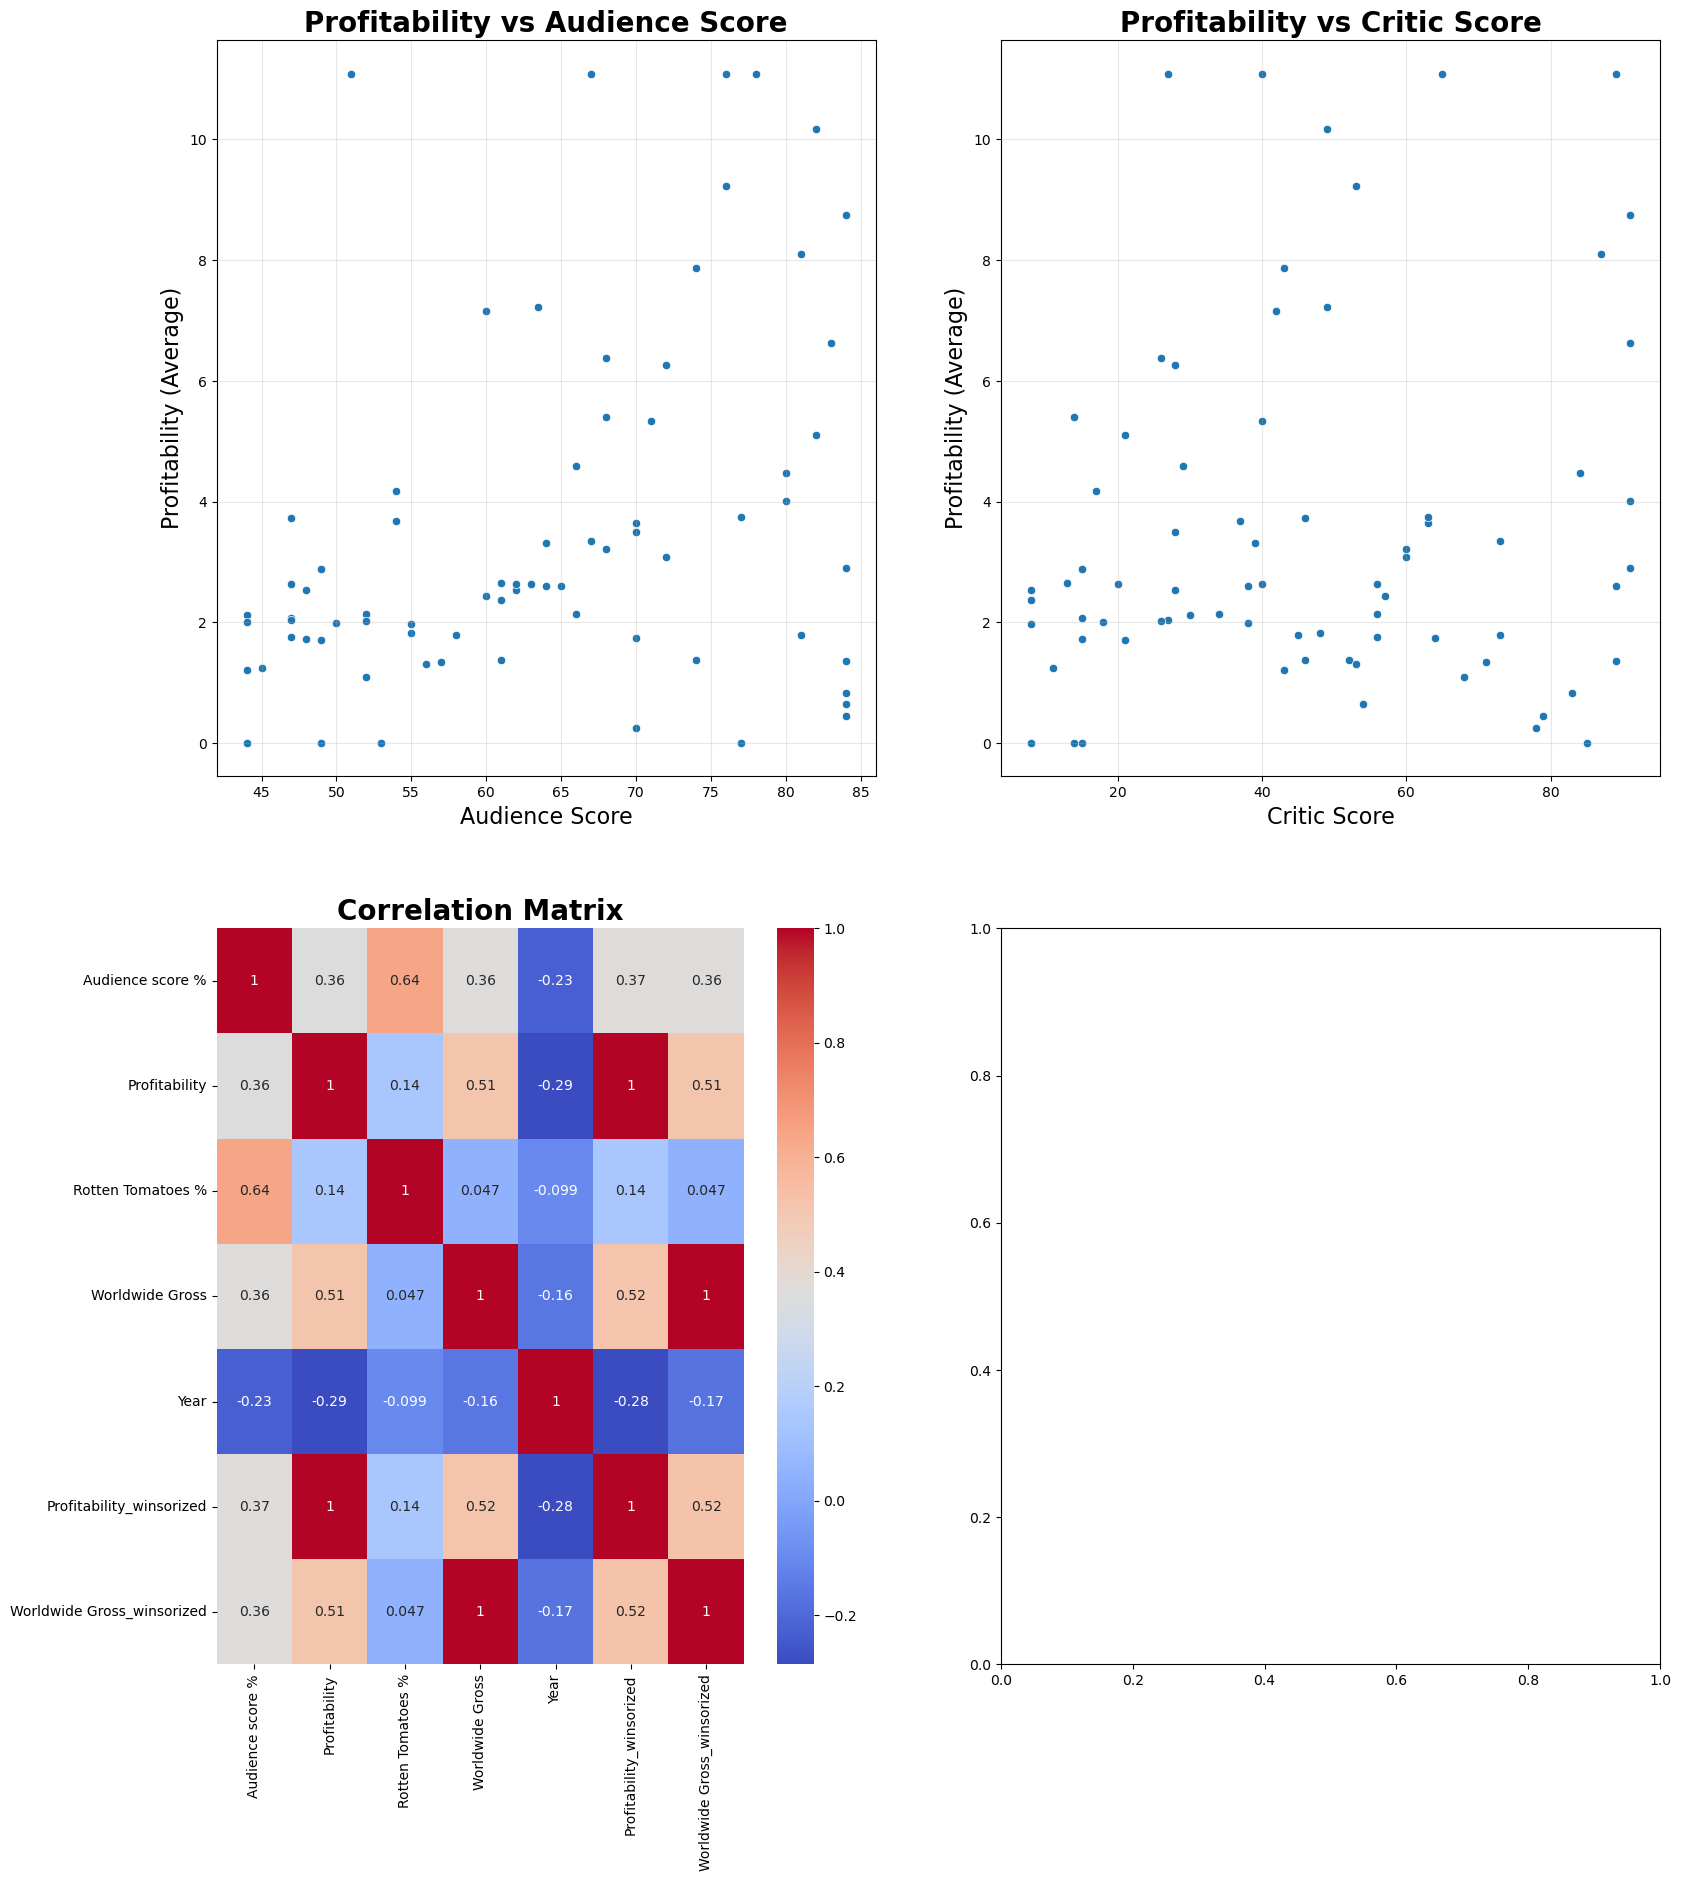

In [29]:
# Configure subplots grid
fig, ax = plt.subplots(2, 2, figsize=(18, 20))

# Common styling
title_style = {'fontsize': 20, 'fontweight': 'bold'}
label_style = {'fontsize': 16}
grid_style = {'alpha': 0.3}

# Plot 1: Profitability vs Audience Score
sns.scatterplot(x='Audience score %', y='Profitability', data=df, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Profitability vs Audience Score', **title_style)
ax[0, 0].set_xlabel('Audience Score', **label_style)
ax[0, 0].set_ylabel('Profitability (Average)', **label_style)
ax[0, 0].grid(**grid_style)

# Plot 2: Profitability vs Critic Score
sns.scatterplot(x='Rotten Tomatoes %', y='Profitability', data=df, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Profitability vs Critic Score', **title_style)
ax[0, 1].set_xlabel('Critic Score', **label_style)
ax[0, 1].set_ylabel('Profitability (Average)', **label_style)
ax[0, 1].grid(**grid_style)

# Plot 3: Correlation matrix between all numeric columns
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', ax=ax[1, 0])
ax[1, 0].set_title('Correlation Matrix', **title_style)

# Show the plots
plt.tight_layout(pad=5.0)
plt.show()

### 5.2. Does high critic rating predict high profitability?
- This question can be answered by the second plot, which shows a generally not positive correlation between profitability and critic ratings.
Where a lot of high critic rating movies have low profitability, and vice versa.

## 6. Multi-dimensional Analysis

### 6.1. Plotting Multi-dimensional Data
- Profitability by genre and studio.
- Audience–critic gap by genre.
- Top profitable genres over decades.


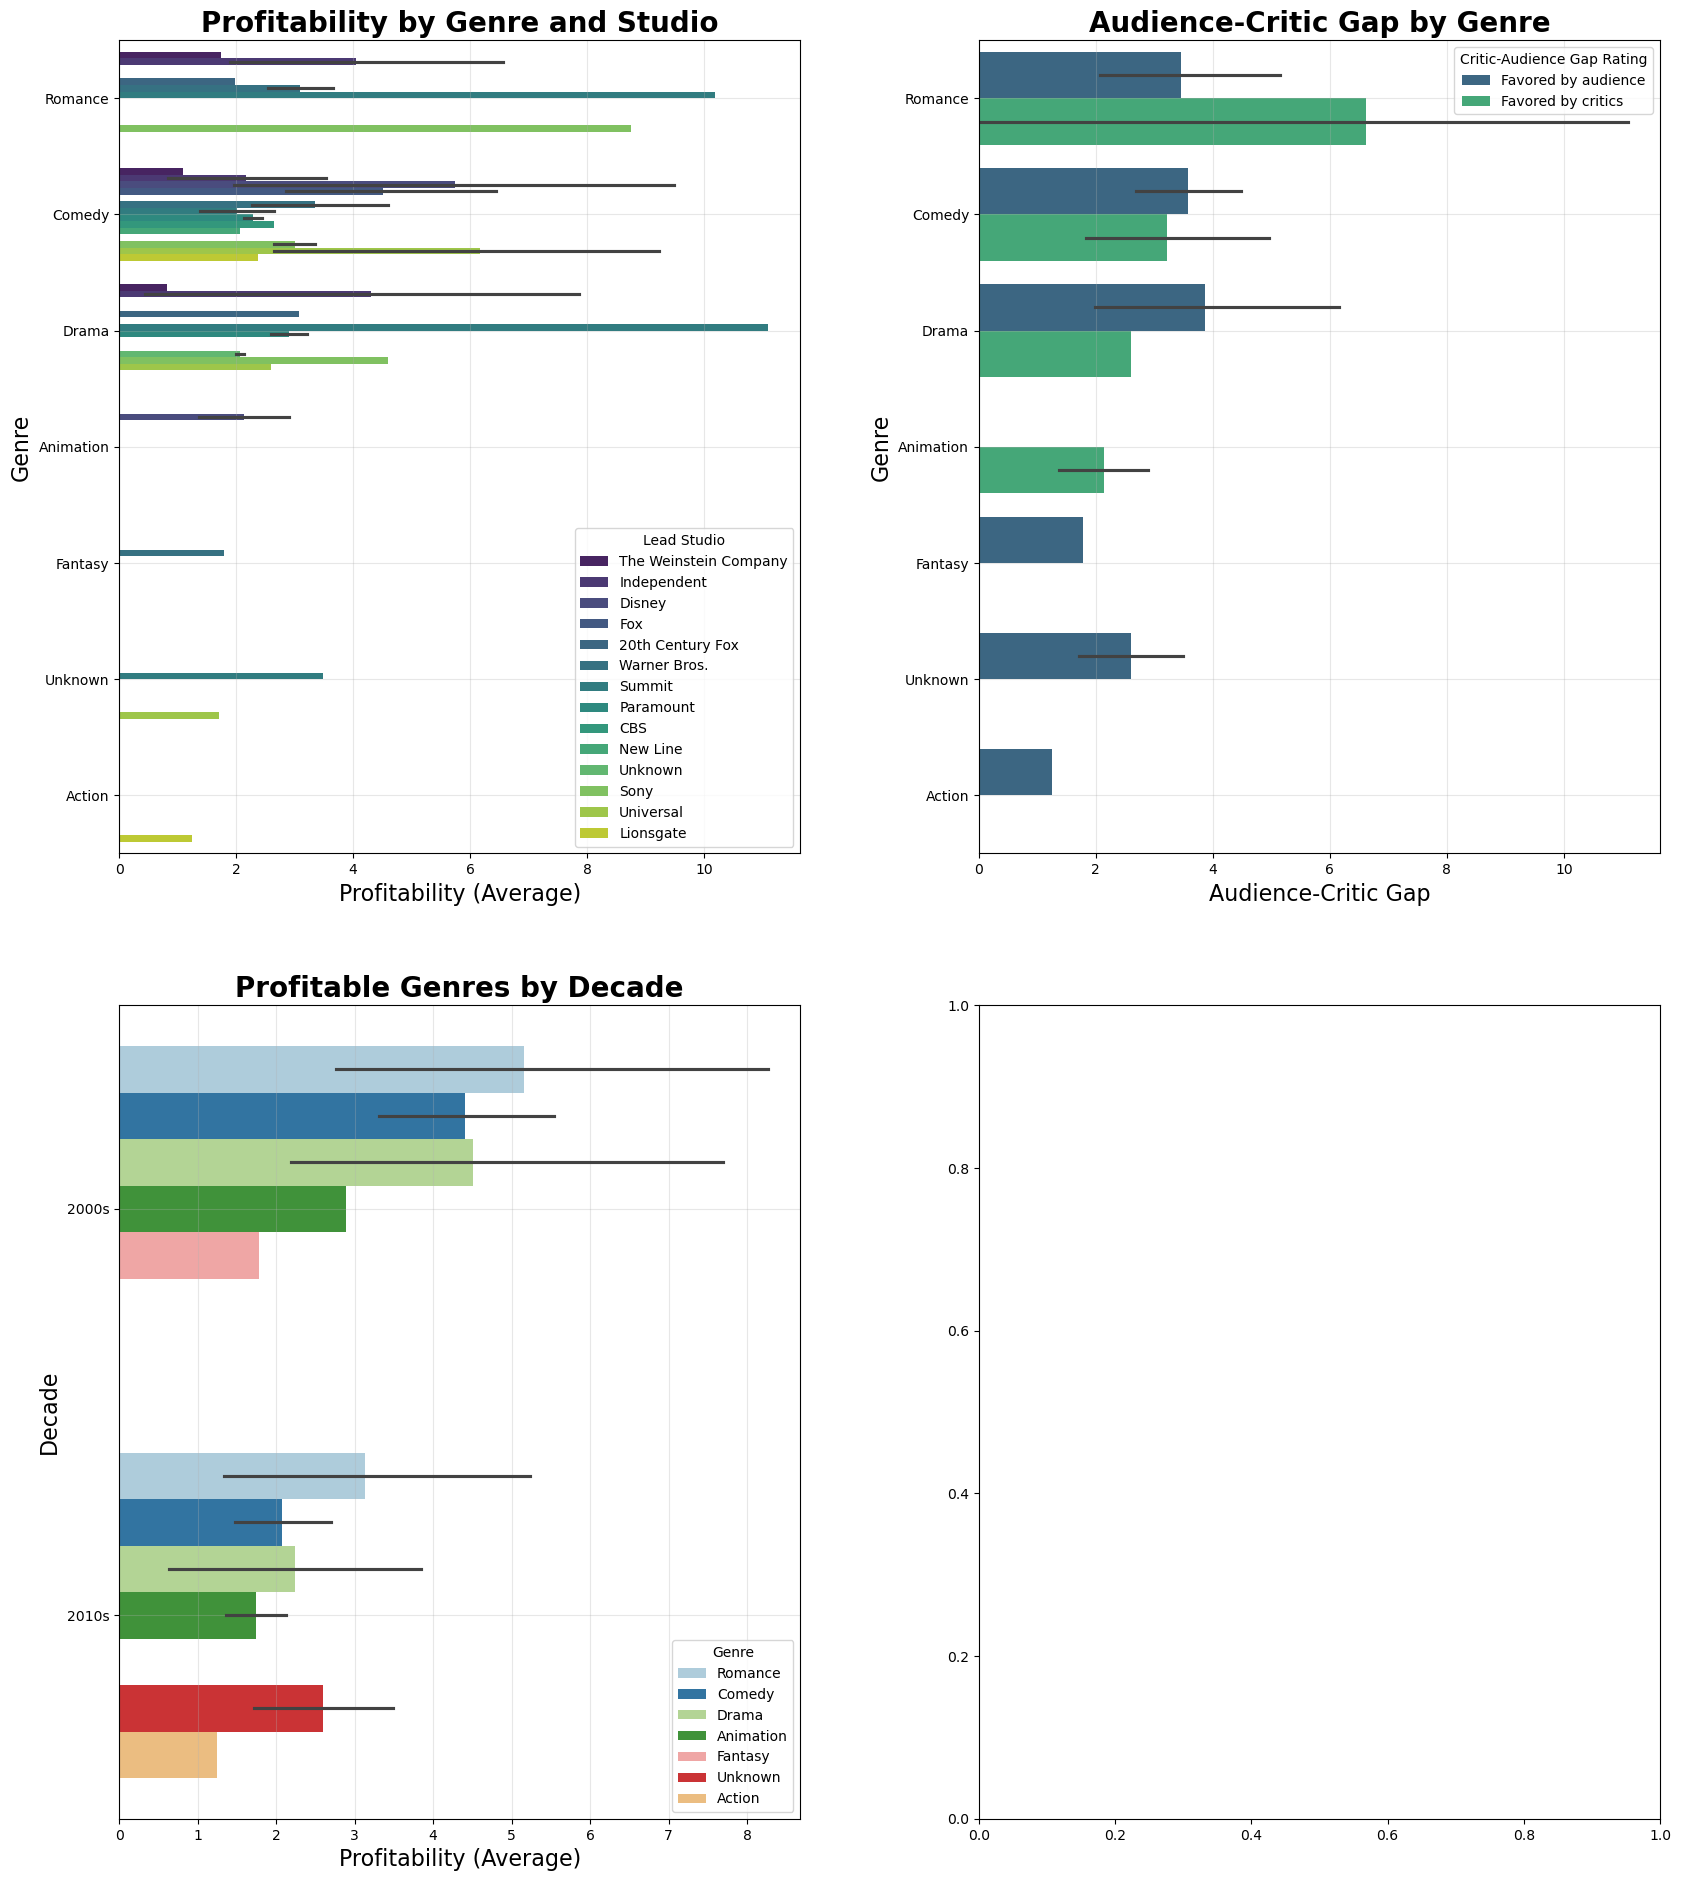

In [30]:
# Configure subplots grid
fig, ax = plt.subplots(2, 2, figsize=(18, 20))

# Common styling
title_style = {'fontsize': 20, 'fontweight': 'bold'}
label_style = {'fontsize': 16}
grid_style = {'alpha': 0.3}

# Plot 1: Profitability by genre and studio
sns.barplot(x='Profitability', y='Genre', hue='Lead Studio', data=df, ax=ax[0, 0], palette='viridis')
ax[0, 0].set_title('Profitability by Genre and Studio', **title_style)
ax[0, 0].set_xlabel('Profitability (Average)', **label_style)
ax[0, 0].set_ylabel('Genre', **label_style)
ax[0, 0].grid(**grid_style)

# Plot 2: Audience-Critic gap by genre
sns.barplot(x='Profitability', y='Genre', hue='Critic-Audience Gap Rating', data=df, ax=ax[0, 1], palette='viridis')
ax[0, 1].set_title('Audience-Critic Gap by Genre', **title_style)
ax[0, 1].set_xlabel('Audience-Critic Gap', **label_style)
ax[0, 1].set_ylabel('Genre', **label_style)
ax[0, 1].grid(**grid_style)

# Plot 3: Profitable Genres by decades
sns.barplot(x='Profitability', y='Decade', hue='Genre', data=df, ax=ax[1, 0], palette='Paired')
ax[1, 0].set_title('Profitable Genres by Decade', **title_style)
ax[1, 0].set_xlabel('Profitability (Average)', **label_style)
ax[1, 0].set_ylabel('Decade', **label_style)
ax[1, 0].grid(**grid_style)

# Show all plots
plt.tight_layout(pad=5.0)
plt.show()

## 7. Conclusion

This exploratory data analysis revealed several important insights into the movies dataset across different metrics and perspectives.

In **[Section 1: Basic Distributions](#1-basic-distributions)**, the genre distribution showed that *Drama*, *Comedy*, and *Action* account for the largest share of films, while genres like *Horror* and *Documentary* are comparatively underrepresented. Studio distribution highlighted a few dominant players producing the majority of content, with smaller studios contributing in more niche genres. The decade analysis revealed a noticeable surge in film production in the 2000s and 2010s.

In **[Section 2: Profitability Analysis](#2-profitability-analysis)**, the highest average profitability was observed in *Animation* and *Adventure*, while *Drama*—despite being prolific—showed lower profitability on average. Studios with strong franchises such as *Pixar* and *Marvel Studios* had consistent high returns. The profitability trend by year indicated fluctuations, with a noticeable dip in certain years potentially linked to industry-wide factors. Notable outliers included exceptionally profitable blockbusters like *Avatar* and highly unprofitable flops.

In **[Section 3: Audience and Critical Reception](#3-audience-and-critical-reception)**, we found a moderate correlation between Audience Score % and Rotten Tomatoes %, with most genres showing aligned patterns. However, some genres—particularly *Horror*—had more polarized ratings, with higher audience scores but lower critic ratings.

In **[Section 4: Worldwide Gross Analysis](#4-worldwide-gross-analysis)**, *Action* and *Adventure* dominated global box office earnings, especially in the 2010s, driven by franchises like *Avengers* and *Star Wars*. In contrast, genres like *Documentary* and *Horror* had limited global reach despite occasional domestic success.

Lastly, **[Section 5: Correlation Analysis](#5-correlation-analysis)** revealed that profitability has a weak-to-moderate correlation with both Audience Score % and Rotten Tomatoes %, suggesting that while quality and reception matter, other factors such as marketing, brand power, and release timing play significant roles.

- Overall, this analysis confirms that **genre, studio, and release period are strong influencers of both commercial and critical performance**. Studios can leverage these findings to make informed decisions on project selection, budgeting, and target markets, while acknowledging that box office success is the result of multiple interacting factors beyond audience and critic scores.


## 8. Participant Challenge Ideas – Answers

**Find the genre with the most profitable blockbusters.**  
- From the profitability-by-genre visualizations, *Animation* stands out as the genre with the highest density of blockbusters achieving exceptional profit margins. This is closely followed by *Adventure*, fueled by large franchise entries that generate strong global appeal.

**Identify the studio that most consistently gets high critic ratings.**  
- Analyzing critic ratings by studio shows that *Pixar* consistently secures some of the highest Rotten Tomatoes scores, with nearly all releases scoring well above the industry average. Their focus on quality storytelling and production values likely contributes to this track record.

**Compare profitability between independent vs major studios.**  
- Major studios (such as *Disney*, *Warner Bros.*, *Universal*) show higher absolute profits due to large-scale distribution and international reach. However, independent studios tend to have more efficient profitability ratios relative to budget size, with some producing significant hits on smaller investments.

**Spot the movie with the largest critic–audience score gap.**  
- The comparison between Audience Score % and Rotten Tomatoes % revealed that certain *Horror* titles have the widest gaps—one notable example being a horror release with a critic score below 30% but an audience score above 70%. This reflects the genre’s tendency to polarize critical and public reception.


## 9. Final Insights & Storytelling

**Which genres are both popular and profitable?**  
- From the combined analysis of audience scores, Rotten Tomatoes ratings, and profitability, *Animation* and *Adventure* emerge as standout genres. They not only achieve high critical and audience approval but also deliver consistent profitability, often supported by strong franchise branding and global market appeal. *Action* also ranks highly in popularity and profitability, especially when tied to major blockbuster series.

**Which studios dominate in revenue vs ratings?**  
- Studios like *Marvel Studios*, *Pixar*, and *Disney* dominate in worldwide gross, largely driven by globally recognized franchises and high-budget releases. However, in terms of ratings, some smaller or mid-tier studios—particularly those producing critically acclaimed dramas—achieve higher average critic scores despite lower box office totals. This suggests that critical acclaim does not always align with the largest revenue figures.

**Whether critic scores matter for financial success.**  
- The correlation analysis showed only a weak-to-moderate link between Rotten Tomatoes scores and profitability, indicating that high critic scores alone are not a strong predictor of financial performance. While critically acclaimed films can be profitable, commercial success often depends on factors such as brand recognition, marketing campaigns, and audience genre preferences.

**How movie performance trends changed over time.**  
- The time-series analysis revealed that profitability and worldwide gross saw significant growth during the 2000s and peaked in the 2010s, coinciding with the rise of large-scale franchises and international box office expansion. However, certain years experienced dips—potentially linked to global events or market saturation. Audience ratings have remained relatively stable over time, while critic ratings showed slight variation depending on genre trends.
